<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/LCROSS_Plume_Water_Detection_Data_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LCROSS Plume Water Detection Data



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = {'Compound':['water', 'hydrogen sulfide', 'hydrogen gas', 'carbon monoxide', 'calcium', 'ammonia','mercury','magnesium','sulfur dioxide','ethylene','carbon dioxide','methanol','methane'],
        'Symbol':['H2O','H2S','H2','CO','Ca','NH3','Hg','Mg','SO2','C2H4','CO2','CH3OH','CH4'],
        'Concentration (wt%)':[5.5,0.92,0.69,0.57,0.4,0.33,0.24,0.19,0.18,0.17,0.12,0.09,0.04]}
df = pd.DataFrame(data)
df

,Compound,Symbol,Concentration (wt%)
0,water,H2O,5.50
1,hydrogen sulfide,H2S,0.92
2,hydrogen gas,H2,0.69
3,carbon monoxide,CO,0.57
4,calcium,Ca,0.40
5,ammonia,NH3,0.33
6,mercury,Hg,0.24
7,magnesium,Mg,0.19
8,sulfur dioxide,SO2,0.18
9,ethylene,C2H4,0.17


In [6]:
df2 = pd.read_csv('https://raw.githubusercontent.com/denizd1/GEOL557_Project/main/data/ColapreteA_2010_LCROSS_Plume_Water_Detection_CorrectedTable_from_GeorgeandChris.csv')
df2

,Compound,Symbol,Concentration (wt%)
0,water,H2O,5.50
1,hydrogen sulfide,H2S,0.92
2,hydrogen gas,H2,0.69
3,carbon monoxide,CO,0.57
4,Calcium,Ca,0.40
5,Ammonia,NH3,0.33
6,Mercury,Hg,0.24
7,Magnesium,Mg,0.19
8,Sulfur dioxide,SO2,0.18
9,Ethylene,C2H4,0.17


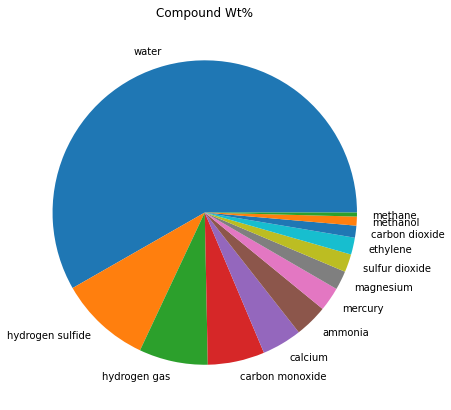

In [7]:
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(df['Concentration (wt%)'], labels = df['Compound']) 
plt.title('Compound Wt%')
# show plot 
plt.show() 

In [8]:
#df['Carbon']=df.string.search('')
df['Carbon']=df["Symbol"].str.startswith('C')
df

,Compound,Symbol,Concentration (wt%),Carbon
0,water,H20,5.50,False
1,hydrogen sulfide,H2S,0.92,False
2,hydrogen gas,H2,0.69,False
3,carbon monoxide,CO,0.57,True
4,calcium,Ca,0.40,True
5,ammonia,NH3,0.33,False
6,mercury,Hg,0.24,False
7,magnesium,Mg,0.19,False
8,sulfur dioxide,SO2,0.18,False
9,ethylene,C2H4,0.17,True


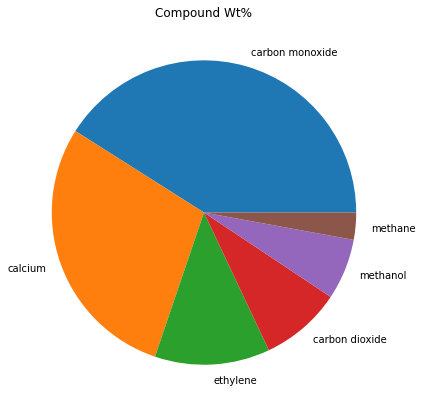

In [9]:
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
c_only = pd.DataFrame(df.groupby(['Carbon']))
c_only = c_only.iloc[1][1]
plt.pie(c_only['Concentration (wt%)'], labels = c_only['Compound']) 
plt.title('Compound Wt%')
# show plot 
plt.show() 
#df_first = df[(df.Pclass == 1)]

In [1]:
pip install chemparse #https://pypi.org/project/chemparse/

  Created wheel for chemparse: filename=chemparse-0.1.0-cp36-none-any.whl size=2913 sha256=2d32eb6bb56063cc765125229fe1d0fb96bf9d527a1562a7466837b3bc5ebe14
  Stored in directory: /root/.cache/pip/wheels/6d/14/a5/1fee5885ee2793f331fe97ce98392ab4ee79b02147bbb4a59d
Successfully built chemparse


In [10]:
import chemparse

print(chemparse.parse_formula("C6H12O6"))

{'C': 6.0, 'H': 12.0, 'O': 6.0}


In [21]:
df['Symbol'].to_list()[0]

'H20'

In [34]:
aa=chemparse.parse_formula(df['Symbol'].to_list()[0])
print(type(aa))

<class 'dict'>


In [29]:
elements=[]
for i in range(len(df['Symbol'].to_list())):
  elements.append(chemparse.parse_formula(df['Symbol'].to_list()[i]))
elements

[{'H': 2.0, 'O': 1.0},
 {'H': 2.0, 'S': 1.0},
 {'H': 2.0},
 {'C': 1.0, 'O': 1.0},
 {'Ca': 1.0},
 {'H': 3.0, 'N': 1.0},
 {'Hg': 1.0},
 {'Mg': 1.0},
 {'O': 2.0, 'S': 1.0},
 {'C': 2.0, 'H': 4.0},
 {'C': 1.0, 'O': 2.0},
 {'C': 1.0, 'H': 4.0, 'O': 1.0},
 {'C': 1.0, 'H': 4.0}]

In [36]:
df_e = pd.DataFrame(elements)
df_e

,H,O,S,C,Ca,N,Hg,Mg
0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
9,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [54]:
df_m = pd.concat([df, df_e], axis=1, sort=False)
df_m=df_m.fillna(0)
df_m

,Compound,Symbol,Concentration (wt%),H,O,S,C,Ca,N,Hg,Mg
0,water,H2O,5.50,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hydrogen sulfide,H2S,0.92,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,hydrogen gas,H2,0.69,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,carbon monoxide,CO,0.57,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,calcium,Ca,0.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,ammonia,NH3,0.33,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,mercury,Hg,0.24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,magnesium,Mg,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,sulfur dioxide,SO2,0.18,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ethylene,C2H4,0.17,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [55]:
df_m.iloc[:,3:11].sum()

H     21.0
O      7.0
S      2.0
C      6.0
Ca     1.0
N      1.0
Hg     1.0
Mg     1.0
dtype: float64

In [ ]:
# merge them together, aligning rows based on their labels in the index
#df_merged = pd.merge(left=df_econ, right=df_race, how='inner', left_index=True, right_index=True)
#df_merged.head()
